In [11]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plab
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [12]:
#data
df = pd.read_csv("Data/ufo_sightings_scrubbed.csv")

/tmp/ipykernel_88401/936585683.py:2: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Data/ufo_sightings_scrubbed.csv")


In [13]:
# Convert the datetime column to datetime type
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

In [14]:
# Drop rows with invalid datetime
df = df.dropna(subset=['datetime'])

In [15]:
# Extract year for analysis
df['year'] = df['datetime'].dt.year

In [24]:
# Identify the top 3 shapes
top_shapes = df['shape'].value_counts().head(3).index

In [25]:
# Filter data for the top 3 shapes
top_shapes_data = df[df['shape'].isin(top_shapes)]

In [26]:
# Group data by year and shape
grouped_data = top_shapes_data.groupby(['year', 'shape']).size().unstack(fill_value=0)

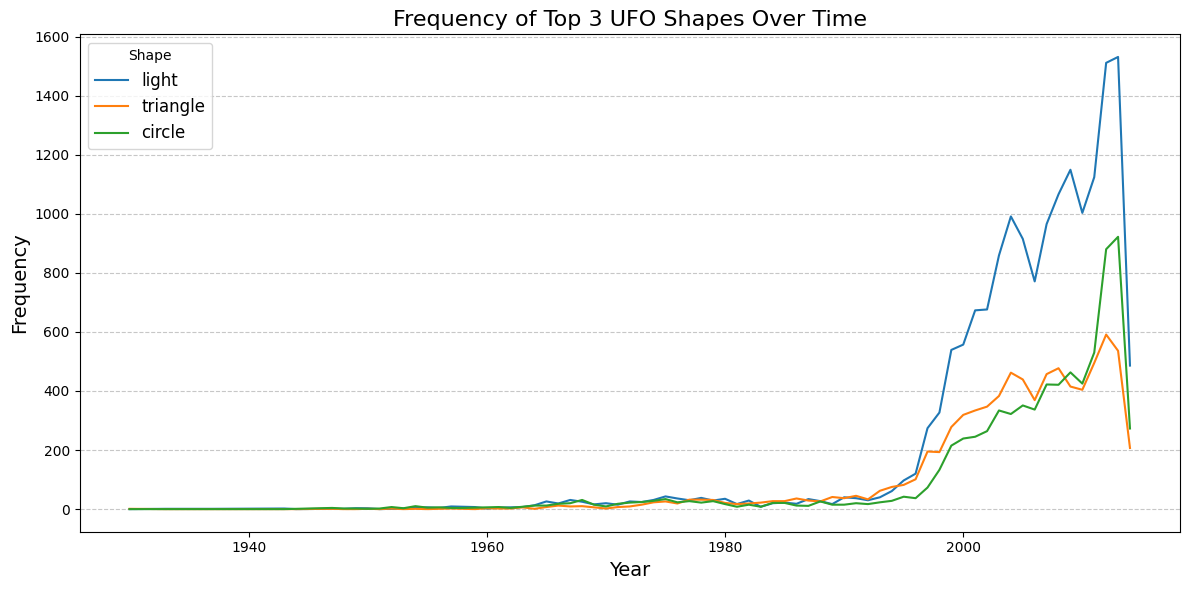

In [27]:
# Plot the trends
plt.figure(figsize=(12, 6))
for shape in top_shapes:
    plt.plot(grouped_data.index, grouped_data[shape], label=shape)

plt.title('Frequency of Top 3 UFO Shapes Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title="Shape", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [29]:
print(grouped_data.head(5))

shape  circle  light  triangle
year                          
1930        0      0         1
1933        0      1         0
1937        0      1         0
1943        0      2         0
1944        1      0         0
